# Predictive Analytics and Advanced Regression to Predict Home Values

1. Which features of a home have the greatest positive impact on the home values?
2. Which features of a home have the greatest negative impact on the home values?
3. Which features could be discarded, saving on building costs?
4. How much percentage resale value would an additional unit add to your home? 1 sqft, 1 room , … 
5. What feature formula predicts housing prices most accurately?


https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview


### Import Modules/Packages

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import pandas as pd
print('The pandas version is {}'.format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('The matplotlib version is {}'.format(matplotlib.__version__))
import numpy as np
print('The numpy version is {}'.format(np.__version__))
import seaborn as sns 

The scikit-learn version is 1.0.2.
The pandas version is 1.4.4
The matplotlib version is 3.5.2
The numpy version is 1.21.5


In [14]:
df_house_train = pd.read_csv(r'C:\Users\nicho\OneDrive\UCF MS - FinTech\CAP 5619\House Prediction Data\train.csv', low_memory=False)
df_house_test = pd.read_csv(r'C:\Users\nicho\OneDrive\UCF MS - FinTech\CAP 5619\House Prediction Data\test.csv', low_memory=False)

# drop columns with all NaN values
df_house_train.dropna(axis=1, how='all')
df_house_test.dropna(axis=1, how='all')

# limit to only residential properties 
residential = ["FV", "RH", "RL", "RP", "RM"]
df_house_train = df_house_train[df_house_train['MSZoning'].isin(residential)] 
df_house_test = df_house_test[df_house_test['MSZoning'].isin(residential)] 
print ("Train Data Shape: ", df_house_train.shape)
print ("Test Data Shape: ", df_house_test.shape)

Train Data Shape:  (1450, 81)
Test Data Shape:  (1440, 80)


### Import Data (Train and Test)

In [15]:
df_house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Train Data Sample

### Column Data Types

In [16]:
print(df_house_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### Data Summary & Findings

#### Data Statistical Summary

In [17]:
df_house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1191.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,731.364138,56.903448,70.052897,10523.831724,6.114483,5.582069,1971.593103,1985.049655,104.404300,445.162759,...,94.826897,46.537931,21.536552,3.433103,15.096552,2.777931,43.365517,6.312414,2007.812414,181654.942069
std,421.554345,42.265033,24.301013,10012.185355,1.372860,1.107330,30.022696,20.552319,181.486539,456.353871,...,125.560863,65.222761,60.838826,29.416948,55.893399,40.315051,497.636495,2.698244,1.326321,79176.485241
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.500000,50.000000,70.000000,9496.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,1096.750000,70.000000,80.000000,11613.500000,7.000000,6.000000,2001.000000,2004.000000,166.750000,713.750000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Data Information

In [18]:
df_house_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1450 non-null   int64  
 1   MSSubClass     1450 non-null   int64  
 2   MSZoning       1450 non-null   object 
 3   LotFrontage    1191 non-null   float64
 4   LotArea        1450 non-null   int64  
 5   Street         1450 non-null   object 
 6   Alley          89 non-null     object 
 7   LotShape       1450 non-null   object 
 8   LandContour    1450 non-null   object 
 9   Utilities      1450 non-null   object 
 10  LotConfig      1450 non-null   object 
 11  LandSlope      1450 non-null   object 
 12  Neighborhood   1450 non-null   object 
 13  Condition1     1450 non-null   object 
 14  Condition2     1450 non-null   object 
 15  BldgType       1450 non-null   object 
 16  HouseStyle     1450 non-null   object 
 17  OverallQual    1450 non-null   int64  
 18  OverallC

#### Missing Data

In [19]:
print(df_house_train.select_dtypes(object).isna().sum())
print("Total number of missing values:",df_house_train.isna().sum().sum())

MSZoning            0
Street              0
Alley            1361
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       681
GarageType         79
GarageFinish       79
GarageQual         79
GarageCond         79
PavedDrive          0
PoolQC           1443
Fence            1172
MiscFeature      1398
SaleType            0
SaleCondition       0
dtype: int64
Total number of missing values: 6913


#### Correlation by feature

In [38]:
# Pairwise Pearson correlations
price_correlations = df_house_train.corrwith(df_house_train['SalePrice'])
print(price_correlations)

Id              -0.024353
MSSubClass      -0.087487
LotFrontage      0.354848
LotArea          0.264715
OverallQual      0.789031
OverallCond     -0.089084
YearBuilt        0.517602
YearRemodAdd     0.501186
MasVnrArea       0.475950
BsmtFinSF1       0.384475
BsmtFinSF2      -0.014145
BsmtUnfSF        0.216152
TotalBsmtSF      0.612088
1stFlrSF         0.603300
2ndFlrSF         0.319774
LowQualFinSF    -0.018755
GrLivArea        0.708658
BsmtFullBath     0.224054
BsmtHalfBath    -0.017561
FullBath         0.556674
HalfBath         0.280882
BedroomAbvGr     0.162008
KitchenAbvGr    -0.137825
TotRmsAbvGrd     0.533355
Fireplaces       0.463264
GarageYrBlt      0.486058
GarageCars       0.642135
GarageArea       0.629831
WoodDeckSF       0.320770
OpenPorchSF      0.329491
EnclosedPorch   -0.120765
3SsnPorch        0.043807
ScreenPorch      0.110540
PoolArea         0.092396
MiscVal         -0.021052
MoSold           0.051987
YrSold          -0.025391
SalePrice        1.000000
dtype: float

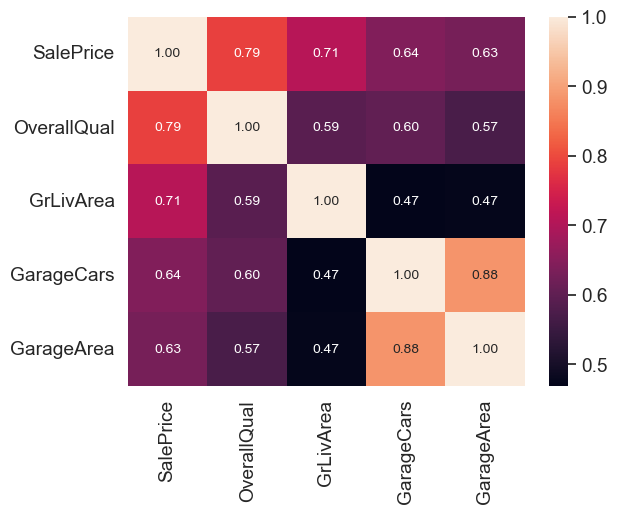

In [86]:
correlation = df_house_train.corr()
top_5_corr = correlation.nlargest(5, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_house_train[top_5_corr].values.T)
correlation_heatmap = sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=top_5_corr.values, xticklabels=top_10_corr.values)

#### Building Type

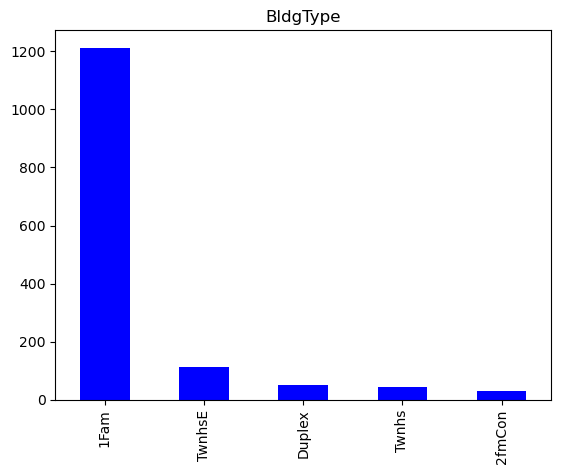

In [22]:
df_house_train['BldgType'].value_counts().head(10).plot(kind='bar', color='b')
plt.title('BldgType');

### Results

In [23]:
print('The average house price is', "${:,.2f}".format(df_house_train['SalePrice'].mean()))

The average house price is $181,654.94


In [24]:
ann_sales = df_house_train.groupby(['YrSold'])['SalePrice'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
print(ann_sales)

   YrSold  Count
3    2009    336
1    2007    328
0    2006    312
2    2008    302
4    2010    172


### Predictors

### Data Visualization 

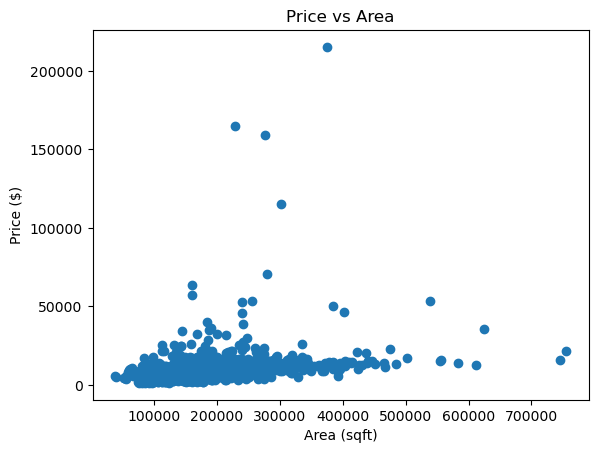

In [25]:
# plot a scatter plot price vs area
plt.scatter(df_house_train['SalePrice'], df_house_train['LotArea'])
# set axis lables
plt.xlabel("Area (sqft)")
plt.ylabel("Price ($)")
# set chart title
plt.title("Price vs Area")
plt.show()

### Questions

#### 1. Which features of a home have the greatest positive impact on the home values?

In [74]:
print(top_5_corr)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
